# Project 4 Part 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['font.size']=17

df = pd.read_csv('[scrape2].csv', index_col=0) # no additional unnamed col of seperate index values
print df.shape,'\n'

# drop duplicate rows
df = df.drop_duplicates()
df.reset_index(drop=True, inplace = True) # drop=True to avoid old index being added as a column
print df.shape,'\n'
df.head()

(3382, 6) 

(2664, 6) 



,city,job_title,company_name,location,summary,salary
0,New+York,Machine Learning Intern,Oath Inc,"New York, NY",Deep dive into the data to understand and appl...,nothing_found
1,New+York,Mgr/Sr Mgr - Risk Management - Data Scientist,American Express,"New York, NY",As Data Scientist you will apply your expertis...,nothing_found
2,New+York,Student / Intern,Oracle,"New York, NY","We are looking for bright, motivated data scie...","$50,000 a year"
3,New+York,Quantitative Analyst,State Street,"New York, NY",Demonstrated ability to translate complex data...,"$130,000 - $158,000 a year"
4,New+York,"Analyst - Healthcare Analytics & Delivery, McK...",McKinsey & Company,"New York, NY 10022 (Midtown area)","It is a unique mix of Healthcare Experts, phys...",nothing_found


In [51]:
# format salary data
df['salary'].value_counts()

nothing_found                               2487
$5,666 - $6,500 a month                        8
$6,250 - $10,833 a month                       6
$114,590 - $148,967 a year                     4
$32,900 - $59,100 a year                       4
$53,200 - $79,800 a year                       4
$129,000 - $193,000 a year                     2
$55,000 - $85,000 a year                       2
$5,000 a month                                 2
$110,000 - $140,000 a year (Indeed est.)       2
$80,000 - $110,000 a year                      2
$65,000 a year                                 2
$19.68 an hour                                 2
$96,970 - $126,062 a year                      2
$3,519 a month                                 2
$95,000 - $120,000 a year                      2
$15 an hour                                    2
$98,000 - $147,000 a year                      2
$84,000 - $107,000 a year (Indeed est.)        2
$109,000 - $139,000 a year (Indeed est.)       2
$77,058 - $119,121 a

In [52]:
# clean '$', ','
df['salary'] = df['salary'].map(lambda x: x.replace('$',''))
df['salary'] = df['salary'].map(lambda x: x.replace(',',''))

# lowercase
for i in range(0,5):
    df.iloc[:,i]= map(str.lower, df.iloc[:,i])
df

,city,job_title,company_name,location,summary,salary
0,new+york,machine learning intern,oath inc,"new york, ny",deep dive into the data to understand and appl...,nothing_found
1,new+york,mgr/sr mgr - risk management - data scientist,american express,"new york, ny",as data scientist you will apply your expertis...,nothing_found
2,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",50000 a year
3,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,130000 - 158000 a year
4,new+york,"analyst - healthcare analytics & delivery, mck...",mckinsey & company,"new york, ny 10022 (midtown area)","it is a unique mix of healthcare experts, phys...",nothing_found
5,new+york,junior research analyst intern,acuris,"new york, ny",prepare data for market and sector reports for...,nothing_found
6,new+york,"associate director, lead data scientist",s&p global,"new york, ny 10041 (financial district area)",you will need to work closely with internal st...,nothing_found
7,new+york,"manager, business & data analysis - business i...",siriusxm,"new york, ny 10104 (midtown area)",excellent data analysis skills. this position ...,nothing_found
8,new+york,"quantitative software engineer, feature modeli...","two sigma investments, llc.","new york, ny",a high impact role that works directly with da...,nothing_found
9,new+york,natural language processing (nlp) engineer (vi...,morgan stanley,"new york, ny 10032 (washington heights area)",we are a highly motivated and collaborative te...,nothing_found


In [53]:
# creating a salary period column

salary_period = []
for row in df['salary']:
    if 'year' in row:
        salary_period.append('year')
    elif 'month' in row:
        salary_period.append('month')
    elif 'day' in row:
        salary_period.append('day')
    elif 'hour' in row:
        salary_period.append('hour')
    else:
        salary_period.append(0)
df['salary_period'] = salary_period


In [54]:
# regex to remove the text
import re
df['salary'] = df['salary'].map(lambda x: re.sub('a.*$','',x))
df.head()

,city,job_title,company_name,location,summary,salary,salary_period
0,new+york,machine learning intern,oath inc,"new york, ny",deep dive into the data to understand and appl...,nothing_found,0
1,new+york,mgr/sr mgr - risk management - data scientist,american express,"new york, ny",as data scientist you will apply your expertis...,nothing_found,0
2,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",50000,year
3,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,130000 - 158000,year
4,new+york,"analyst - healthcare analytics & delivery, mck...",mckinsey & company,"new york, ny 10022 (midtown area)","it is a unique mix of healthcare experts, phys...",nothing_found,0


In [55]:
sal = df[df['salary'] != 'nothing_found']
print sal.shape,'\n'
sal.head()

(177, 7) 



,city,job_title,company_name,location,summary,salary,salary_period
2,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",50000,year
3,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,130000 - 158000,year
20,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,14.93 - 23.73,hour
45,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",11,hour
137,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,19.68,hour


In [56]:
# strip out the text

for row in sal['salary']:
    if 'year' in row:
        row.replace('a year','')
    elif 'month' in row:
        row.replace('a month','')
    elif 'hour' in row:
        row.replace('an hour','')
    else:
        pass
        
sal.head()    

,city,job_title,company_name,location,summary,salary,salary_period
2,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",50000,year
3,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,130000 - 158000,year
20,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,14.93 - 23.73,hour
45,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",11,hour
137,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,19.68,hour


In [57]:
# identify salary information provided in a range
def split_salary(i):
    try:
        splt = i.split('-',1)
        first = float(splt[0])
        second = float(splt[1])
        return (first+second)/2
    except:
        return float(i)

In [58]:
sal['salary_2']= sal['salary'].apply(split_salary)

C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
sal.head()

,city,job_title,company_name,location,summary,salary,salary_period,salary_2
2,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",50000,year,50000.00
3,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,130000 - 158000,year,144000.00
20,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,14.93 - 23.73,hour,19.33
45,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",11,hour,11.00
137,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,19.68,hour,19.68


In [60]:
sal['salary_period'].value_counts()


year     118
month     35
hour      23
day        1
Name: salary_period, dtype: int64

In [61]:
def annual_salary(x):
    if x['salary_period'] == 'year':
        return x['salary_2']
    elif x['salary_period'] == 'month':
        return x['salary_2']*12
    elif x['salary_period'] == 'hour':
        return x['salary_2']*8*5*4*12
    else:
        return x['salary_2']*5*4*12

        
sal['annual_salary'] = sal.apply(annual_salary, axis=1)

sal

C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,city,job_title,company_name,location,summary,salary,salary_period,salary_2,annual_salary
2,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",50000,year,50000.000,50000.0
3,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,130000 - 158000,year,144000.000,144000.0
20,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,14.93 - 23.73,hour,19.330,37113.6
45,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",11,hour,11.000,21120.0
137,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,19.68,hour,19.680,37785.6
146,new+york,it services support assistant/it support assis...,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,19.68,hour,19.680,37785.6
148,new+york,"senior data analyst, bureau of environmental s...",dept of health/mental hygiene,"queens, ny",bwso is looking to hire a city research scient...,70286 - 84753,year,77519.500,77519.5
164,new+york,technician b,columbia university,"new york, ny","70%- experimental planning, execution, data in...",23.19,hour,23.190,44524.8
231,chicago,d3- sr. nlp deep learning data scientist,allstate,"chicago, il 60654 (loop area)",advises data scientists and business partners ...,109000 - 139000,year,124000.000,124000.0
266,chicago,student research assistant,chicago state university,"chicago, il",all research assistants are to perform assigne...,10,hour,10.000,19200.0


count       177.000000
mean      85012.084181
std       40385.974010
min       19200.000000
25%       59000.000000
50%       77519.500000
75%      109500.000000
max      250000.000000
Name: annual_salary, dtype: float64 

Salary Median 77519.5
Salary Mean 85012.0841808


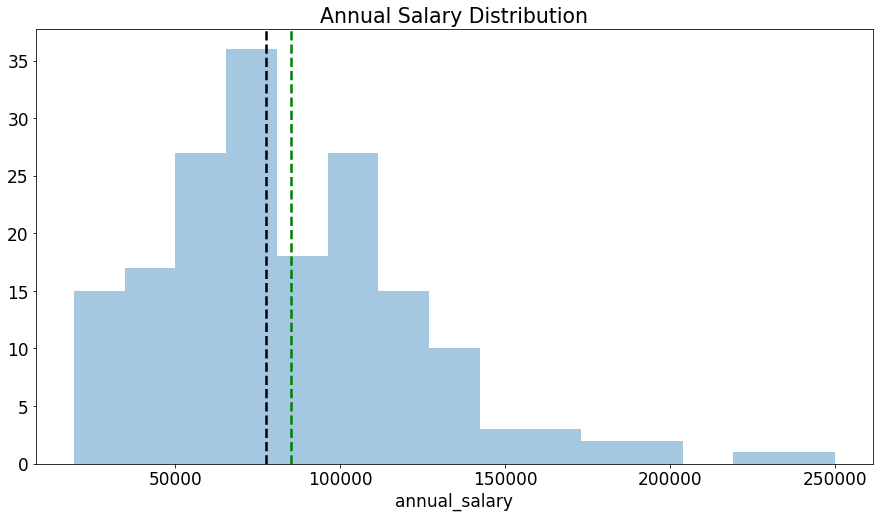

In [62]:
print sal['annual_salary'].describe(),'\n'
print 'Salary Median', sal['annual_salary'].median()
print 'Salary Mean', sal['annual_salary'].mean()

ax = sns.distplot(sal['annual_salary'],bins=15, kde=False)
ax.axvline(sal['annual_salary'].median(), lw=2.5, ls='dashed',color='black')
ax.axvline(sal['annual_salary'].mean(), lw = 2.5, ls='dashed', color='green')
plt.title('Annual Salary Distribution')
plt.show()

In [63]:
'''
Commentary
Data distribution is right skewed, indicating high outliers
Salary Median is $77.5K
Salary Mean is $85.0K

'''

'\nCommentary\nData distribution is right skewed, indicating high outliers\nSalary Median is $77.5K\nSalary Mean is $85.0K\n\n'

In [64]:
def above_med_sal(x):
    if x['annual_salary'] >= sal['annual_salary'].median():
        return 1
    else:
        return 0
        
sal['above_med_sal'] = sal.apply(above_med_sal, axis=1)

C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [65]:
sal.columns

Index([u'city', u'job_title', u'company_name', u'location', u'summary',
       u'salary', u'salary_period', u'salary_2', u'annual_salary',
       u'above_med_sal'],
      dtype='object')

In [66]:
# define X, y
sal_X = sal[['city','job_title','company_name','location','summary']]
sal_y = pd.DataFrame(sal['above_med_sal'])

X_train,X_test,y_train,y_test = train_test_split(sal_X, sal_y, test_size=0.2,stratify=sal_y, random_state=0)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)




In [67]:
'''
Explore job characteristics with NLP
n-gram range 1 - 3 words, words appearing in at least 5% of posting, ignore stop words
Identify n-grams for above_median and below_median jobs
Use ratios for the relative appearance for each n-gram in above, below

'''

cvec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df =.05)
cvec.fit(X_train['job_title'])
job_train = pd.DataFrame(cvec.transform(X_train['job_title']).todense(), columns=cvec.get_feature_names())

word_observe = pd.concat([job_train, y_train],axis=1)
word_observe.head()

,analyst,associate,data,data scientist,developer,engineer,engineering,engineering scientist,engineering scientist associate,learning,...,research engineering,research engineering scientist,research scientist,scientist,scientist associate,senior,software,software engineer,statistician,above_med_sal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,1,1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,1,0,...,1,1,0,2,1,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1


In [68]:
for i in range(2):
    word_count = word_observe[word_observe['above_med_sal']==i].sum(axis=0)
    print i, 'common words'
    cw = word_count.sort_values(ascending=False).head(20)
    print cw

0 common words
research                           33
scientist                          28
associate                          20
analyst                            16
engineering                        15
engineering scientist              14
scientist associate                13
engineering scientist associate    13
research analyst                   11
research engineering                8
research engineering scientist      8
data                                6
research scientist                  4
senior                              4
software                            4
developer                           3
data scientist                      2
machine learning                    1
learning                            1
machine                             1
dtype: int64
1 common words
above_med_sal                     71
scientist                         22
engineer                          20
research                          16
data                              13
software    

In [69]:
# create the ratio
word_count_below = word_observe[word_observe['above_med_sal']==0].sum(axis=0)
word_count_above = word_observe[word_observe['above_med_sal']==1].sum(axis=0)

# create the df, transpose column with index
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

# create ratio column to determine word frequence for above, below median
word_count_compare['above_below_ratio']=word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal                           inf
software engineer                       inf
engineer                                inf
machine                            9.000000
learning                           9.000000
machine learning                   9.000000
statistician                       7.000000
data scientist                     3.500000
software                           3.250000
data                               2.166667
developer                          2.000000
senior                             1.250000
research scientist                 1.250000
scientist                          0.785714
analyst                            0.687500
engineering                        0.600000
engineering scientist              0.500000
research                           0.484848
research analyst                   0.454545
research engineering               0.125000
research engineering scientist     0.125000
scientist associate                0.076923
engineering scientist associate 

In [70]:
'''
Commentary
Larger number means that the ngram appears more in the 'above_med_sal'

'''

"\nCommentary\nLarger number means that the ngram appears more in the 'above_med_sal'\n\n"

In [71]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df =.05)
cvec.fit(X_train['summary'])
job_train = pd.DataFrame(cvec.transform(X_train['summary']).todense(), columns=cvec.get_feature_names())

word_observe = pd.concat([job_train, y_train],axis=1)
word_observe.head()

for i in range(2):
    word_count = word_observe[word_observe['above_med_sal']==i].sum(axis=0)
    print i, 'common words'
    cw = word_count.sort_values(ascending=False).head(20)
    print cw
    
# create the ratio
word_count_below = word_observe[word_observe['above_med_sal']==0].sum(axis=0)
word_count_above = word_observe[word_observe['above_med_sal']==1].sum(axis=0)

# create the df, transpose column with index
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

# create ratio column to determine word frequence for above, below median
word_count_compare['above_below_ratio']=word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)


0 common words
data               107
analysis            20
research            18
scientists          12
scientist           11
data analysis       10
experience          10
analyze              9
processing           8
information          7
software             7
design               7
develop              6
team                 6
analyze data         5
data scientists      4
ability              4
engineers            4
work                 4
quality              4
dtype: int64
1 common words
data               123
above_med_sal       71
analysis            24
scientists          24
experience          18
data analysis       15
research            13
scientist           11
data scientists     11
processing          10
data scientist       9
work                 8
information          7
software             7
knowledge            6
learning             6
design               6
quality              6
team                 6
ability              6
dtype: int64


above_med_sal           inf
learning           3.000000
data scientist     3.000000
data scientists    2.750000
scientists         2.000000
work               2.000000
knowledge          2.000000
experience         1.800000
data analysis      1.500000
ability            1.500000
quality            1.500000
processing         1.250000
engineers          1.250000
analysis           1.200000
data               1.149533
reports            1.000000
results            1.000000
scientist          1.000000
software           1.000000
team               1.000000
information        1.000000
design             0.857143
develop            0.833333
research           0.722222
analyze data       0.600000
analyze            0.333333
Name: above_below_ratio, dtype: float64

In [72]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df =.05)
cvec.fit(X_train['location'])
job_train = pd.DataFrame(cvec.transform(X_train['location']).todense(), columns=cvec.get_feature_names())

word_observe = pd.concat([job_train, y_train],axis=1)
word_observe.head()

for i in range(2):
    word_count = word_observe[word_observe['above_med_sal']==i].sum(axis=0)
    print i, 'common words'
    cw = word_count.sort_values(ascending=False).head(20)
    print cw
    
# create the ratio
word_count_below = word_observe[word_observe['above_med_sal']==0].sum(axis=0)
word_count_above = word_observe[word_observe['above_med_sal']==1].sum(axis=0)

# create the df, transpose column with index
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

# create ratio column to determine word frequence for above, below median
word_count_compare['above_below_ratio']=word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

0 common words
tx                 28
austin             19
austin tx          19
fl                 11
coral gables fl     9
gables fl           9
gables              9
coral               9
coral gables        9
houston tx          8
houston             8
area                6
ca                  4
dc                  3
washington dc       3
pa                  3
washington          3
az                  1
above_med_sal       0
dtype: int64
1 common words
above_med_sal      71
tx                 22
austin             14
austin tx          13
ca                  9
area                9
pa                  9
houston             8
washington dc       8
dc                  8
houston tx          8
washington          8
az                  7
fl                  4
gables fl           1
gables              1
coral gables fl     1
coral gables        1
coral               1
dtype: int64


above_med_sal           inf
az                 7.000000
pa                 3.000000
washington dc      2.666667
washington         2.666667
dc                 2.666667
ca                 2.250000
area               1.500000
houston            1.000000
houston tx         1.000000
tx                 0.785714
austin             0.736842
austin tx          0.684211
fl                 0.363636
gables             0.111111
gables fl          0.111111
coral gables fl    0.111111
coral gables       0.111111
coral              0.111111
Name: above_below_ratio, dtype: float64

In [73]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df =.05)
cvec.fit(X_train['city'])
job_train = pd.DataFrame(cvec.transform(X_train['city']).todense(), columns=cvec.get_feature_names())

word_observe = pd.concat([job_train, y_train],axis=1)
word_observe.head()

for i in range(2):
    word_count = word_observe[word_observe['above_med_sal']==i].sum(axis=0)
    print i, 'common words'
    cw = word_count.sort_values(ascending=False).head(20)
    print cw
    
# create the ratio
word_count_below = word_observe[word_observe['above_med_sal']==0].sum(axis=0)
word_count_above = word_observe[word_observe['above_med_sal']==1].sum(axis=0)

# create the df, transpose column with index
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

# create ratio column to determine word frequence for above, below median
word_count_compare['above_below_ratio']=word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

0 common words
austin           19
miami            11
portland         10
houston           9
washington dc     3
washington        3
dc                3
phoenix           1
philadelphia      1
above_med_sal     0
dtype: int64
1 common words
above_med_sal    71
austin           13
washington dc    10
washington       10
dc               10
houston           8
phoenix           7
philadelphia      7
miami             4
portland          0
dtype: int64


above_med_sal         inf
phoenix          7.000000
philadelphia     7.000000
washington dc    3.333333
washington       3.333333
dc               3.333333
houston          0.888889
austin           0.684211
miami            0.363636
portland         0.000000
Name: above_below_ratio, dtype: float64

In [74]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df =.05)
cvec.fit(X_train['company_name'])
job_train = pd.DataFrame(cvec.transform(X_train['company_name']).todense(), columns=cvec.get_feature_names())

word_observe = pd.concat([job_train, y_train],axis=1)
word_observe.head()

for i in range(2):
    word_count = word_observe[word_observe['above_med_sal']==i].sum(axis=0)
    print i, 'common words'
    cw = word_count.sort_values(ascending=False).head(20)
    print cw
    
# create the ratio
word_count_below = word_observe[word_observe['above_med_sal']==0].sum(axis=0)
word_count_above = word_observe[word_observe['above_med_sal']==1].sum(axis=0)

# create the df, transpose column with index
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

# create ratio column to determine word frequence for above, below median
word_count_compare['above_below_ratio']=word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

0 common words
university                 33
university texas           14
texas                      14
texas austin               13
university texas austin    13
austin                     13
university miami            9
miami                       9
state                       8
md anderson                 5
cancer center               5
anderson cancer             5
anderson cancer center      5
cancer                      5
anderson                    5
center                      5
md                          5
md anderson cancer          5
department                  3
above_med_sal               0
dtype: int64
1 common words
above_med_sal              71
university                 10
department                 10
university texas            8
texas austin                8
texas                       8
austin                      8
university texas austin     8
center                      7
anderson cancer             7
anderson cancer center      7
cancer                     

above_med_sal                   inf
department                 3.333333
md anderson cancer         1.400000
anderson cancer            1.400000
anderson cancer center     1.400000
cancer                     1.400000
cancer center              1.400000
center                     1.400000
md                         1.400000
md anderson                1.400000
anderson                   1.400000
university texas austin    0.615385
texas austin               0.615385
austin                     0.615385
texas                      0.571429
university texas           0.571429
university                 0.303030
state                      0.125000
miami                      0.111111
university miami           0.111111
Name: above_below_ratio, dtype: float64

In [75]:
sal_X.reset_index(drop=True,inplace=True)
sal_X

,city,job_title,company_name,location,summary
0,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie..."
1,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...
2,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...
3,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a..."
4,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...
5,new+york,it services support assistant/it support assis...,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...
6,new+york,"senior data analyst, bureau of environmental s...",dept of health/mental hygiene,"queens, ny",bwso is looking to hire a city research scient...
7,new+york,technician b,columbia university,"new york, ny","70%- experimental planning, execution, data in..."
8,chicago,d3- sr. nlp deep learning data scientist,allstate,"chicago, il 60654 (loop area)",advises data scientists and business partners ...
9,chicago,student research assistant,chicago state university,"chicago, il",all research assistants are to perform assigne...


In [76]:
# sal_y = pd.DataFrame(sal['above_med_sal'])
sal_y.head()


,above_med_sal
2,0
3,1
20,0
45,0
137,0


In [77]:
# convert sal_y into a 1-D array for easier use for modelling
sal_y = pd.DataFrame.as_matrix(sal_y).ravel()
sal_y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1], dtype=int64)

In [78]:
# Feature Engineering

In [79]:
# feature 1 - city

sal_X['city_phoe_phil_wash_dc']=0
sal_X.loc[(sal_X['city'].str.contains('phoenix')|
          sal_X['city'].str.contains('philadelphia')|
          sal_X['city'].str.contains('washington')),'city_phoe_phil_wash_dc']=1
sal_X

C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,job_title,company_name,location,summary,city_phoe_phil_wash_dc
0,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",0
1,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,0
2,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,0
3,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",0
4,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0
5,new+york,it services support assistant/it support assis...,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0
6,new+york,"senior data analyst, bureau of environmental s...",dept of health/mental hygiene,"queens, ny",bwso is looking to hire a city research scient...,0
7,new+york,technician b,columbia university,"new york, ny","70%- experimental planning, execution, data in...",0
8,chicago,d3- sr. nlp deep learning data scientist,allstate,"chicago, il 60654 (loop area)",advises data scientists and business partners ...,0
9,chicago,student research assistant,chicago state university,"chicago, il",all research assistants are to perform assigne...,0


In [80]:
# feature 2,3 - good_job_title, bad_job_title

sal_X['good_job_title']=0
sal_X.loc[(sal_X['job_title'].str.contains('machine learning')|
           sal_X['job_title'].str.contains('software engineer')|
           sal_X['job_title'].str.contains('senior')|
           sal_X['job_title'].str.contains('research scientist')|
          sal_X['job_title'].str.contains('statistician')|
          sal_X['job_title'].str.contains('data scientist')|
          sal_X['job_title'].str.contains('data')), 'good_job_title']=1
      
sal_X['bad_job_title']=0
sal_X.loc[(sal_X['job_title'].str.contains('research')|
           sal_X['job_title'].str.contains('engineering')|
          sal_X['job_title'].str.contains('associate')),'bad_job_title']=1

sal_X

C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,city,job_title,company_name,location,summary,city_phoe_phil_wash_dc,good_job_title,bad_job_title
0,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",0,0,0
1,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,0,0,0
2,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,0,0,0
3,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",0,1,1
4,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0,0,0
5,new+york,it services support assistant/it support assis...,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0,0,0
6,new+york,"senior data analyst, bureau of environmental s...",dept of health/mental hygiene,"queens, ny",bwso is looking to hire a city research scient...,0,1,1
7,new+york,technician b,columbia university,"new york, ny","70%- experimental planning, execution, data in...",0,0,0
8,chicago,d3- sr. nlp deep learning data scientist,allstate,"chicago, il 60654 (loop area)",advises data scientists and business partners ...,0,1,0
9,chicago,student research assistant,chicago state university,"chicago, il",all research assistants are to perform assigne...,0,0,1


In [81]:
# feature 4,5 - good_company, bad_company

sal_X['good_company']=0

sal_X.loc[(sal_X['company_name'].str.contains('cancer')),'good_company']=1 

sal_X['bad_company']=0
sal_X.loc[(sal_X['company_name'].str.contains('university')|
          sal_X['company_name'].str.contains('state')),'bad_company']=1 

sal_X

C:\Users\swm\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,job_title,company_name,location,summary,city_phoe_phil_wash_dc,good_job_title,bad_job_title,good_company,bad_company
0,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",0,0,0,0,0
1,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,0,0,0,0,1
2,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,0,0,0,0,0
3,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",0,1,1,0,0
4,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0,0,0,0,1
5,new+york,it services support assistant/it support assis...,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0,0,0,0,1
6,new+york,"senior data analyst, bureau of environmental s...",dept of health/mental hygiene,"queens, ny",bwso is looking to hire a city research scient...,0,1,1,0,0
7,new+york,technician b,columbia university,"new york, ny","70%- experimental planning, execution, data in...",0,0,0,0,1
8,chicago,d3- sr. nlp deep learning data scientist,allstate,"chicago, il 60654 (loop area)",advises data scientists and business partners ...,0,1,0,0,1
9,chicago,student research assistant,chicago state university,"chicago, il",all research assistants are to perform assigne...,0,0,1,0,1


In [82]:
# feature 6,7 - job_summary - good_job_sum, bad_job_sum

sal_X['good_job_sum']=0

sal_X.loc[(sal_X['summary'].str.contains('learning')|
          sal_X['summary'].str.contains('data scientist')|
          sal_X['summary'].str.contains('data scientists')|
          sal_X['summary'].str.contains('work')|
          sal_X['summary'].str.contains('knowledge')|
          sal_X['summary'].str.contains('data analysis')|
          sal_X['summary'].str.contains('ability')|
          sal_X['summary'].str.contains('quality')|
          sal_X['summary'].str.contains('processing')|
          sal_X['summary'].str.contains('engineers')|
          sal_X['summary'].str.contains('experience')),'good_job_sum']=1 

sal_X['bad_job_sum']=0
sal_X.loc[(sal_X['summary'].str.contains('research')|
          sal_X['summary'].str.contains('analyze data')|
          sal_X['summary'].str.contains('analyze')|
          sal_X['summary'].str.contains('develop')|
          sal_X['summary'].str.contains('design')),'bad_job_sum']=1 

sal_X

,city,job_title,company_name,location,summary,city_phoe_phil_wash_dc,good_job_title,bad_job_title,good_company,bad_company,good_job_sum,bad_job_sum
0,new+york,student / intern,oracle,"new york, ny","we are looking for bright, motivated data scie...",0,0,0,0,0,1,1
1,new+york,quantitative analyst,state street,"new york, ny",demonstrated ability to translate complex data...,0,0,0,0,1,1,0
2,new+york,summer graduate intern,police department,"new york, ny",intern will be responsible for performing stat...,0,0,0,0,0,1,0
3,new+york,data entry analysis associate,cisive,"holtsville, ny","at cisive, our part time data entry analysis a...",0,1,1,0,0,0,0
4,new+york,media services support assistant,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0,0,0,0,1,0,0
5,new+york,it services support assistant/it support assis...,the city university of new york (cuny),"new york, ny",information technology (it) is the division of...,0,0,0,0,1,0,0
6,new+york,"senior data analyst, bureau of environmental s...",dept of health/mental hygiene,"queens, ny",bwso is looking to hire a city research scient...,0,1,1,0,0,1,1
7,new+york,technician b,columbia university,"new york, ny","70%- experimental planning, execution, data in...",0,0,0,0,1,0,0
8,chicago,d3- sr. nlp deep learning data scientist,allstate,"chicago, il 60654 (loop area)",advises data scientists and business partners ...,0,1,0,0,1,1,0
9,chicago,student research assistant,chicago state university,"chicago, il",all research assistants are to perform assigne...,0,0,1,0,1,1,1


In [83]:
# drop original col from sal_X

sal_X.drop(['city','job_title','company_name','location','summary'],axis=1,inplace=True)
sal_X = sal_X.astype('float')
sal_X.head()
sal_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
city_phoe_phil_wash_dc    177 non-null float64
good_job_title            177 non-null float64
bad_job_title             177 non-null float64
good_company              177 non-null float64
bad_company               177 non-null float64
good_job_sum              177 non-null float64
bad_job_sum               177 non-null float64
dtypes: float64(7)
memory usage: 9.8 KB


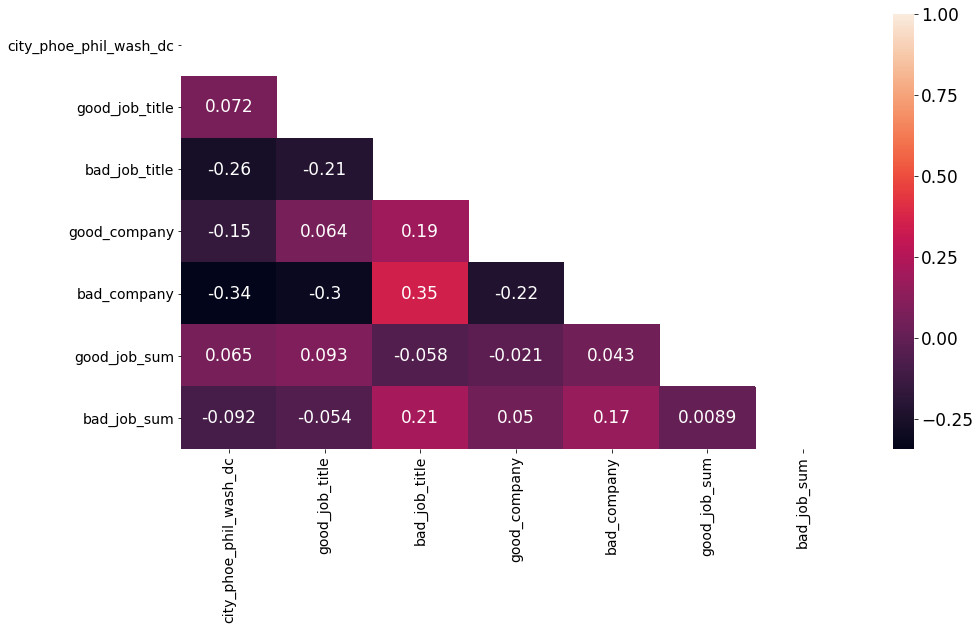

In [84]:
# check corr with the feature set

corr = sal_X.corr()

# Set the default matplotlib figure size to 7x7.
fix, ax = plt.subplots(figsize=(15,8))

# Generate a mask for the upper triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with Seaborn.
# Assign the matplotlib axis the function returns. This will allow us to resize the labels.
ax = sns.heatmap(corr, annot=True,mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [85]:
# good seperation of variables

In [86]:
# simple baseline

print 'Baseline:', np.mean(sal_y)


Baseline: 0.5028248587570622


In [87]:
# test-train split

X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=0)

In [88]:
# Build model : logistic regression; cross_val

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
print 'Score:', logit.score(X_train, y_train)

scores = cross_val_score(logit, X_train, y_train, cv=5)
print 'Cross-validated scores:', scores

Score: 0.75177304964539
Cross-validated scores: [0.72413793 0.5        0.82142857 0.75       0.85714286]


In [89]:
# Use model to predict

y_predict = logit.predict(X_test)
print 'Score:', logit.score(X_test,y_test),'\n'

# classification, confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
print (pd.DataFrame(confusion_matrix(y_test, y_predict),columns=['Predicted_below_median','Predicted_above_median'], index=['Below_median','Above_Median'])),'\n'

# classification report
target_names = ['below_median','above_median']
print (classification_report(y_test, y_predict, target_names=target_names))


Score: 0.6388888888888888 

              Predicted_below_median  Predicted_above_median
Below_median                      11                       7
Above_Median                       6                      12 

              precision    recall  f1-score   support

below_median       0.65      0.61      0.63        18
above_median       0.63      0.67      0.65        18

 avg / total       0.64      0.64      0.64        36



### Commentary

**Score:** 
* Model scored below the test set indicating need for further tuning or more data

**Confusion Matrix:**
Row = Ground Truth; Column = Prediction

* 11 is below median real and predicted correct
* 7 is below median (real) and predicted above median (incorrect)

* 12 is above median real and predicted correct
* 6 is above media real and predicted below median (incorrect)

**Classification Report:**
* Precision = how useful is the model; how many positives are really true (TP/(TP+FP)) or TP/Predicted_True
* Recall/Sensitivity = how complete is the model; of all actual, % correct (TP/(TP+FN)) or TP/Real_True
* f1 = weighted harmonic mean of precision and recall. best = 1, worst = 0
* support = # of observations for each class




0.638888888888889


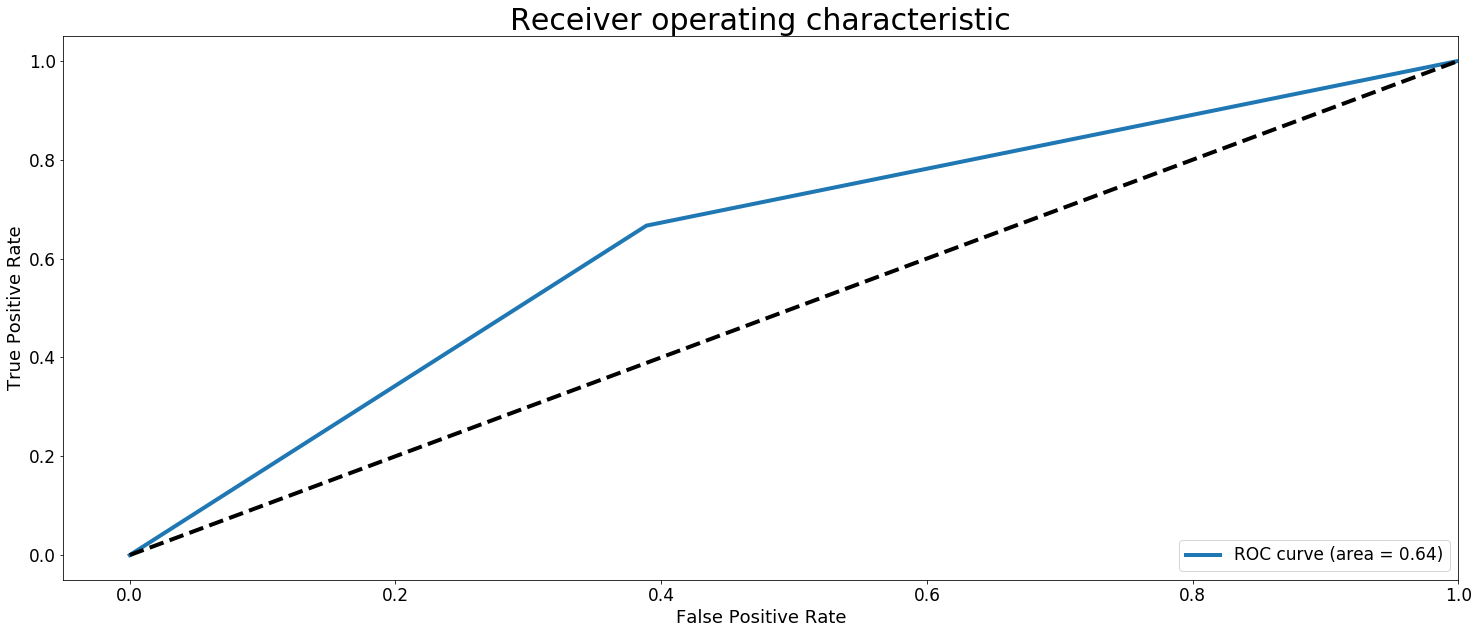

In [90]:
# visualising the model with the roc-auc plot

from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, logit.predict(X_test))
roc_auc = auc(fpr, tpr)
print roc_auc

# Plot of a ROC curve for class 1
plt.figure(figsize=[25,10])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=30)
plt.legend(loc="lower right")
plt.show()

In [91]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=0)

gbm0.fit(X_train,y_train)
print 'Score:', gbm0.score(X_train, y_train)

scores = cross_val_score(gbm0, X_train, y_train, cv=5)
print 'Cross-validated scores:',scores

Score: 0.8297872340425532
Cross-validated scores: [0.75862069 0.5        0.82142857 0.78571429 0.82142857]


In [92]:
# Use model to predict

y_predict = gbm0.predict(X_test)
print 'Score:', gbm0.score(X_test,y_test),'\n'

# confusion matrix
print (pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['Predicted_below_median','Predicted_above_median'], index=['Below_median','Above_Median'])),'\n'

# classification report
target_names = ['below_median','above_median']
print (classification_report(y_test, y_predict, target_names=target_names))

Score: 0.8333333333333334 

              Predicted_below_median  Predicted_above_median
Below_median                      17                       1
Above_Median                       5                      13 

              precision    recall  f1-score   support

below_median       0.77      0.94      0.85        18
above_median       0.93      0.72      0.81        18

 avg / total       0.85      0.83      0.83        36



### Commentary

# Using Gradient Boosting with no parameter tuning

**Score:**
* Better than logistic regression

**Confusion Matrix:**
Row = Ground Truth; Column = Prediction

* 17 is below median (real) and predicted correct
* FP: 1 is below median (real) and predicted above median (incorrect)

* 13 is above median (real) and predicted correct
* FN: 5 is above median (real) and predicted below median (incorrect)

**Classification Report**
* Precision (accuracy) - Model predicts above median more accurately than below median    
* Recall (completeness) - Model is more complete for below_median
* f1 score is balanced between both above and below median


0.8333333333333334


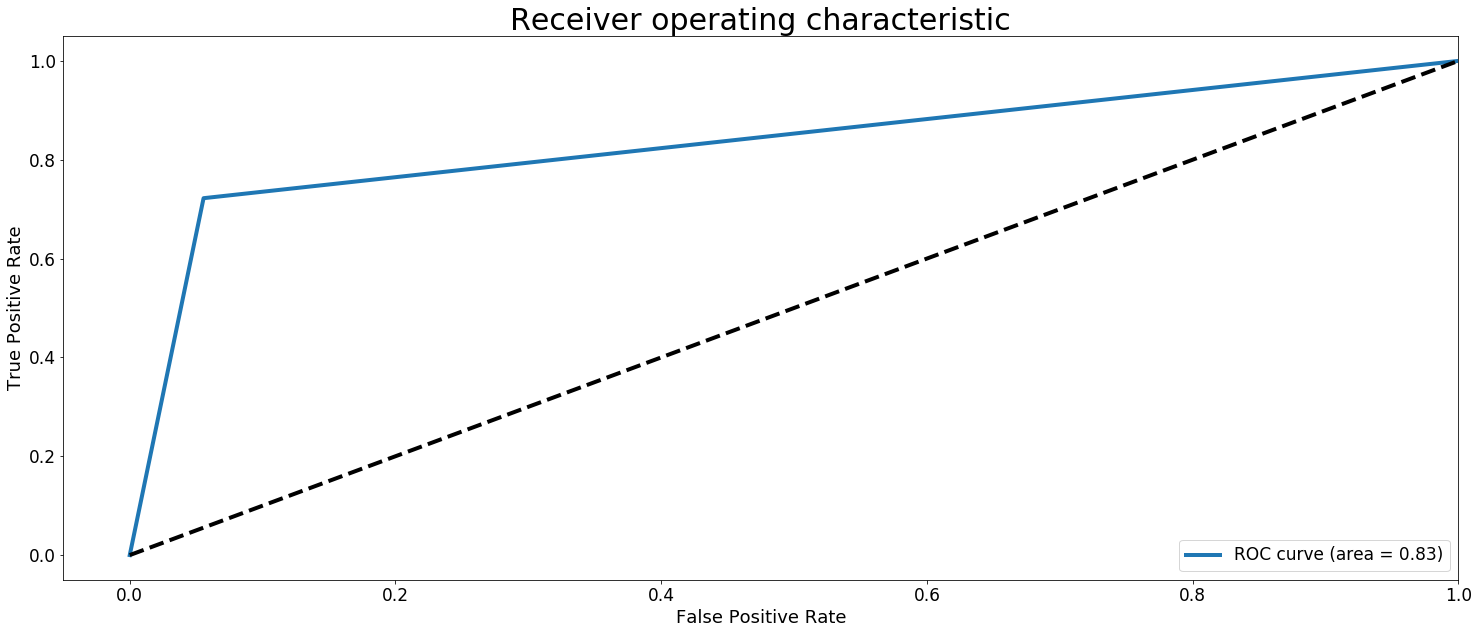

In [93]:
# visualising the model with the roc-auc plot

from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, gbm0.predict(X_test))
roc_auc = auc(fpr, tpr)
print roc_auc

# Plot of a ROC curve for class 1
plt.figure(figsize=[25,10])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=30)
plt.legend(loc="lower right")
plt.show()

### BONUS PROBLEM
Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client 
incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain 
what it is doing and any tradeoffs. Plot the ROC curve.

**Requirement**
* Achieve Zero False Positive(high specificity) - Below Median (real) and Zero predicted Above Median
* If it is a False Negative - Above Median (real) and predicted below median, that is acceptable
* Trade off is that a higher specificity means lower sensitivity (model is less accurate) 


**Approach**
1. Optimise for sensitivity using GridSearchCV with the scoring argument
2. Adjust the decision treshold to identify the operating point

precision_recall_curve and roc_curve can be used to visualise the 
sensitivity-specificity tradeoff in the classifier. Helps inform where to set
the decision treshold to maximize sensitivity or specificity. This is called
the 'operation point' of the model.

.predict_proba() and .decision_function() returns the raw probability that 
a sample is predicted to be in a class. This is an important distinction
from the absolute class predictions returned by calling the .predict
method.








In [94]:
# GridSearchCV with scoring argument

# Recall above - Use logit model to predict

y_predict = logit.predict(X_test)
print 'Score:', logit.score(X_test,y_test),'\n'

# classification, confusion matrix
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


# confusion matrix
print (confusion_matrix(y_test, y_predict) columns=['Predicted_below_median', 'Predicted_above_median'],
                   index=['Below_median','Above_Median'])),'\n'
      
# classification report
target_names = ['below_median','above_median']
print (classification_report(y_test, y_predict, target_names=target_names))







SyntaxError: invalid syntax (<ipython-input-94-c3309442ee9e>, line 13)

In [ ]:
# set up parameters. Use C regularization strengths on a log scale
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

# solver 'liblinear' for small data set

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-25,0,2)
}

logit_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)

In [ ]:
logit_gridsearch.fit(X_train, y_train)

In [ ]:
# best score on training data
logit_gridsearch.best_score_

In [ ]:
# best parameters on the training data
logit_gridsearch.best_params_

In [ ]:
# assign the best estimator to a variable
best_logit = logit_gridsearch.best_estimator_

In [ ]:
# score it on the test data
best_logit.score(X_test,y_test)

In [ ]:
y_predict_gs = best_logit.predict(X_test)
print 'Score:', best_logit.score(X_test,y_test),'\n'

# classification, confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
print (pd.DataFrame(confusion_matrix(y_test, y_predict_gs),
                    columns=['Predicted_below_median', 'Predicted_above_median'],
                   index=['Below_median','Above_Median'])),'\n'

# classification report
target_names = ['below_median','above_median']
print (classification_report(y_test, y_predict_gs, target_names=target_names))


In [ ]:
# visualising the model with the roc-auc plot

from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, best_logit.predict(X_test))
roc_auc = auc(fpr, tpr)
print roc_auc

# Plot of a ROC curve for class 1
plt.figure(figsize=[25,10])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=30)
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_scores = y_predict_gs
p,r,tresholds = precision_recall_curve(y_test,y_scores)